In [ ]:
#I used this code to have a look at the CODEX spectra, just to see what they looked like

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import synphot as synph
import pysynphot as S
import glob
zp = [24.63, 25.11, 24.80, 24.36, 22.83] # ugriz
filt = ['u', 'g', 'r', 'i', 'z']
radius = 0.1012800e15 # cm

/Users/reneehlozek/anaconda3/lib/python3.6/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/Users/reneehlozek/anaconda3/lib/python3.6/site-packages/pysynphot/locations.py:329: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


o54/OA44f.all1106.248480.txt


/Users/reneehlozek/Projects/MIRA/1500_REPOSITORY/CODEX/synphot.py:64: RuntimeWarning: invalid value encountered in double_scalars
  res = np.trapz(pbspl*spc[g],x[g])/np.trapz(pbspl,x[g])


(5,)
u [ nan  nan  nan  nan  nan]
(5,)
g [ 23.46430222  23.94430222  23.63430222  23.19430222  21.66430222]
(5,)
r [ 21.7369721  22.2169721  21.9069721  21.4669721  19.9369721]
(5,)
i [ 18.65314609  19.13314609  18.82314609  18.38314609  16.85314609]
(5,)
z [ 16.8369566  17.3169566  17.0069566  16.5669566  15.0369566]
o54/OA44f.all1106.248680.txt
(5,)
u [ nan  nan  nan  nan  nan]
(5,)
g [ 21.32488315  21.80488315  21.49488315  21.05488315  19.52488315]
(5,)
r [ 20.16078466  20.64078466  20.33078466  19.89078466  18.36078466]
(5,)
i [ 17.02852824  17.50852824  17.19852824  16.75852824  15.22852824]
(5,)
z [ 15.72145708  16.20145708  15.89145708  15.45145708  13.92145708]
o54/OA44f.all1106.248900.txt
(5,)
u [ nan  nan  nan  nan  nan]
(5,)
g [ 19.02300194  19.50300194  19.19300194  18.75300194  17.22300194]
(5,)
r [ 18.47277074  18.95277074  18.64277074  18.20277074  16.67277074]
(5,)
i [ 15.94569218  16.42569218  16.11569218  15.67569218  14.14569218]
(5,)
z [ 15.10690526  15.58690526  1

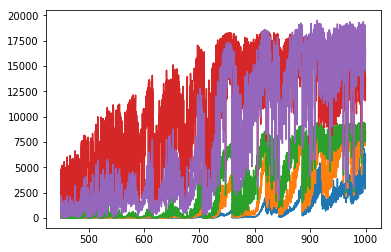

In [5]:

datfiles = glob.glob('o54/OA44f.all1106*.txt')[0:5]
for  i,datf in enumerate(datfiles):
    print(datf)
    data= np.transpose(np.genfromtxt(datf,skip_header=4))
    wave=data[0] # wavelength in micron
    wave = wave*1000.0 #wavelength in nm
    indskeep = np.where((wave<1000.0) & (wave> 300.0))[0]
    lum=data[1] #luminosity in L(erg/s/um)
    flux = lum/(4*np.pi*radius**2) #flux in erg/s/um/cm^2
    flux = flux/10000.0 # flux in erg/s/A/cm^2
    wave = wave[indskeep]
    flux = flux[indskeep]
    plt.plot(wave, flux)
    
    for i, zero in enumerate(zp):
        filter = filt[i]
        file = 'filter_%s.dat.txt'%filter
        #print(filter, zero, file)

        mag = synph.synphot(wave,flux,file,zp)
        print( filter, mag)

In [ ]:

plt.plot(wave,flux)

In [ ]:
plt.plot(wave,flux)
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e3,1e6)
plt.ylim(1e-6,1e4)
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel(r'$F_\lambda [erg/s/Angstrom/cm^2]$')



In [ ]:
filtfile ='filt/u.dat.txt' 
x1=filtfile.split('/')
nx=len(x1)
xfin=x1[nx-1]
fp='/'
for i in range(nx-1): 
    fp=fp+x1[i]+'/'
    print(fp)

In [ ]:
plt.plot(wave,lum)
#plt.yscale("log")
#plt.xscale("log")
plt.xlim(0.6,0.9)
#plt.ylim(1e28,1e39)

In [ ]:
plt.plot(wave,lum)
#plt.yscale("log")
#plt.xscale("log")
plt.xlim(0.5,2.5)
#plt.ylim(1e28,1e39)

In [ ]:
synp.synphot(wavelength[phase == 0],flux[phase == 0],filterfile,zpt)